In [2]:
import numpy as np
from sklearn import tree

import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

## A very simple regression tree example

In this example, we will compare our manually computed division with the scikit-learn model. 

In [3]:
# asign x and y
x = np.array([1, 2, 3, 4])
y = np.array([1, 2, 2, 4])

In [4]:
# build a simple decision tree with depth 3
clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(x[:, np.newaxis], y)
y_pred = clf.predict(np.arange(len(x))[:, np.newaxis])

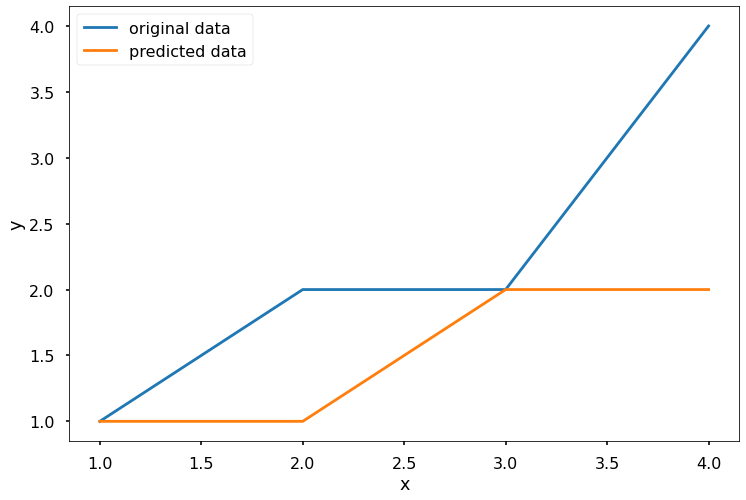

In [6]:
# plot the original data with the prediction
plt.figure(figsize=(12,8))
plt.plot(x, y, label='original data')
plt.plot(x, y_pred, label='predicted data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

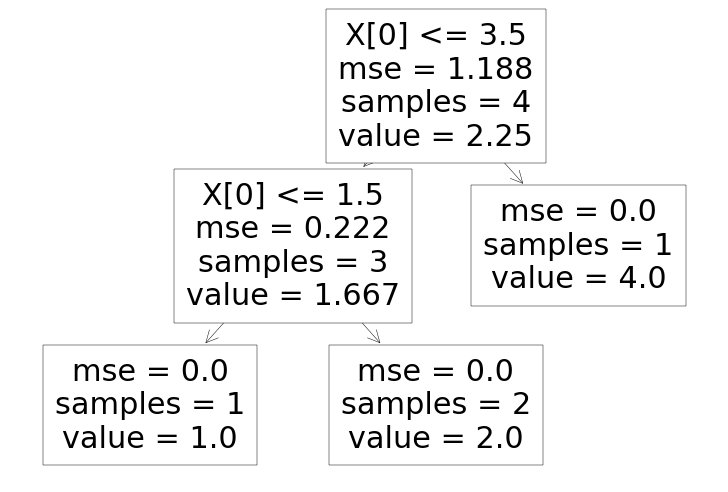

In [7]:
# plot the tree
tree.plot_tree(clf)
plt.show()

In [8]:
def mse(left_set, right_set): 
  """Helper function to compute mse and values for the divided sets."""
  mu_left = np.mean(left_set)
  mu_right = np.mean(right_set)
  mse_v = ((left_set-mu_left)**2 + (right_set-mu_right)**2).mean() 
  return mse_v, mu_left, mu_right

In [9]:
# step 1
cutting_points = x[:-1]+np.diff(x)/2

smallest_mse_1 = 1e10
best_cut_1 = 0
for c in cutting_points:
  left_set = y[x<=c]
  right_set = y[x>c]
  mse_v, left_value, right_value = mse(left_set, right_set)
  print(f"With cutting point {c}, MSE is {mse_v:.3f}, "
        f"left_set values is {left_value:.3f}, "
        f"right_set values is {right_value:.3f}")
  
  if smallest_mse_1 > mse_v:
    smallest_mse_1 = mse_v
    best_cut_1 = c

print(f'Best split at threshold {c}')

With cutting point 1.5, MSE is 0.889, left_set values is 1.000, right_set values is 2.667
With cutting point 2.5, MSE is 1.250, left_set values is 1.500, right_set values is 3.000
With cutting point 3.5, MSE is 0.222, left_set values is 1.667, right_set values is 4.000
Best split at threshold 3.5


In [10]:
# step 2
x_2 = x[x<=best_cut_1]
y_2 = y[x<best_cut_1]

smallest_mse_2 = 1e10
best_cut_2 = 0

cutting_points = x_2[:-1]+np.diff(x_2)/2

for c in cutting_points:
  left_set = y_2[x_2<=c]
  right_set = y_2[x_2>c]
  mse_v, left_value, right_value = mse(left_set, right_set)
  print(f"With cutting point {c}, MSE is {mse_v:.3f}, "
        f"left_set values is {left_value:.3f}, "
        f"right_set values is {right_value:.3f}")
  
  if smallest_mse_2 > mse_v:
    smallest_mse_2 = mse_v
    best_cut_2 = c

print(f'Best split at threshold {best_cut_2}')

With cutting point 1.5, MSE is 0.000, left_set values is 1.000, right_set values is 2.000
With cutting point 2.5, MSE is 0.250, left_set values is 1.500, right_set values is 2.000
Best split at threshold 1.5


## Decision tree - depth 2

Let's first play with a simple 1D regression example, and see how decision tree fit the data as well as how it choses the values to split.

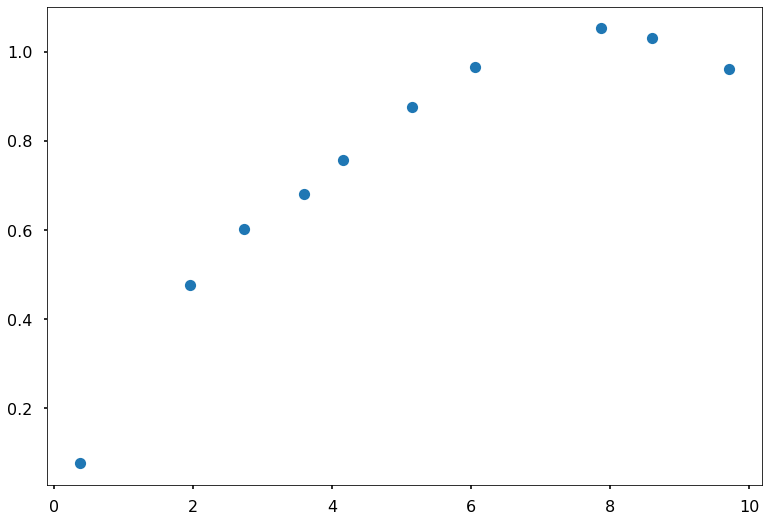

In [11]:
np.random.seed(42)
n = 10
x = np.arange(n) + np.random.random(n)
y = np.sin(0.2*x)
noise = np.random.random(len(x)) * 0.1
y_n = y + noise
plt.plot(x, y_n, 'o')
plt.show()

Training a model in sklearn is very simple, you just initialize the model (this is where you can specify many different hyper-parameters), and then use the `fit` function for the training. After training, you can use `predict` function to estimate on new data. In the following block, we design a tree with maximum depth 2, which means when it grows the tree to two branches from the root node, it will stop. 

In [12]:
clf = tree.DecisionTreeRegressor(max_depth=2)
clf = clf.fit(x[:, np.newaxis], y_n)
y_pred = clf.predict(np.arange(n)[:, np.newaxis])

Let's plot the results and see how the fitting performs. 



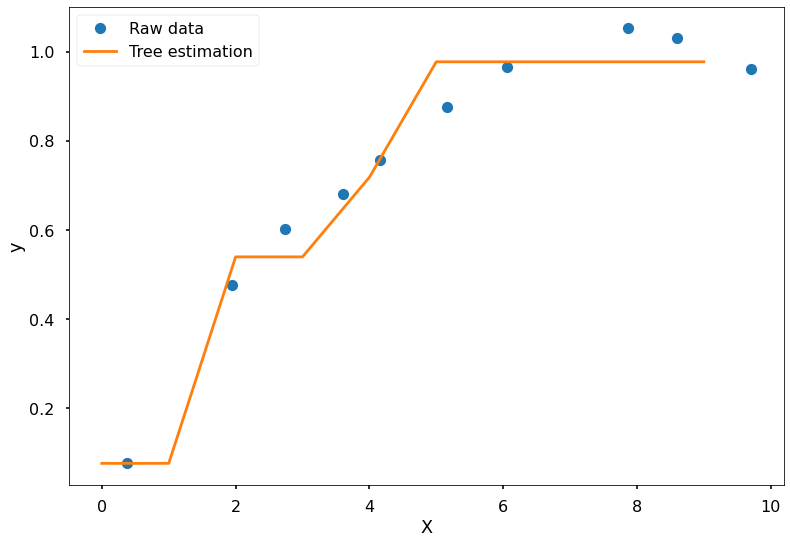

In [13]:
plt.plot(x, y_n, 'o', label = 'Raw data')
plt.plot(np.arange(n), y_pred, label='Tree estimation')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

We can plot the trained tree, and see how the model grows the trees using different split values. 

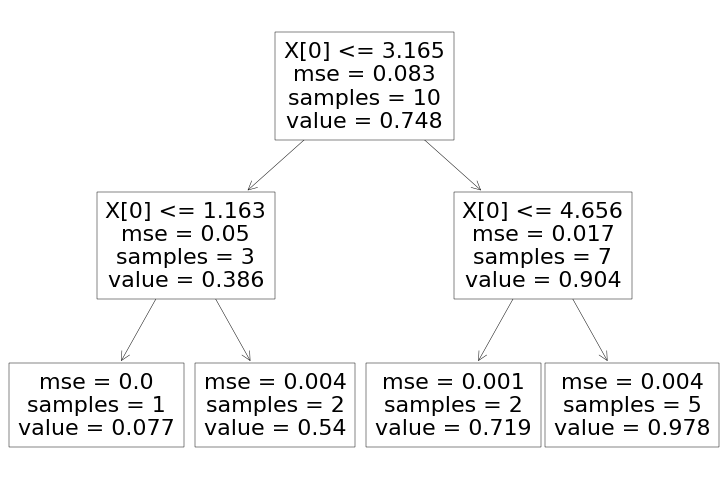

In [14]:
tree.plot_tree(clf)
plt.show()

From the above tree split figures, we can confirm that the first split value is selected as the average of the $x_2$ and $x_3$ (sorted from small to largest). The value of the estimation is calculated using the average of all the samples within the range. 

In [15]:
(x[3] + x[2]) / 2

3.165326213004221

In [16]:
np.mean(y_n[(x <= 3.207)])

0.3856886526655306

In [17]:
np.mean(y_n[(x <= 3.027) & (x>1.406)])

0.5400847596398464

## Decision tree - depth 5

We can see the model with more depth is more flexible, and can fit more wiggles in the data. Also, the growing tree stops when there is only 1 sample left in the range or reach maximum 5 depth. You can change the stopping requirement by change the `min_samples_leaf` parameter, for example. 

In [18]:
clf = tree.DecisionTreeRegressor(max_depth=5)
clf = clf.fit(x[:, np.newaxis], y_n)
y_pred = clf.predict(np.arange(n)[:, np.newaxis])

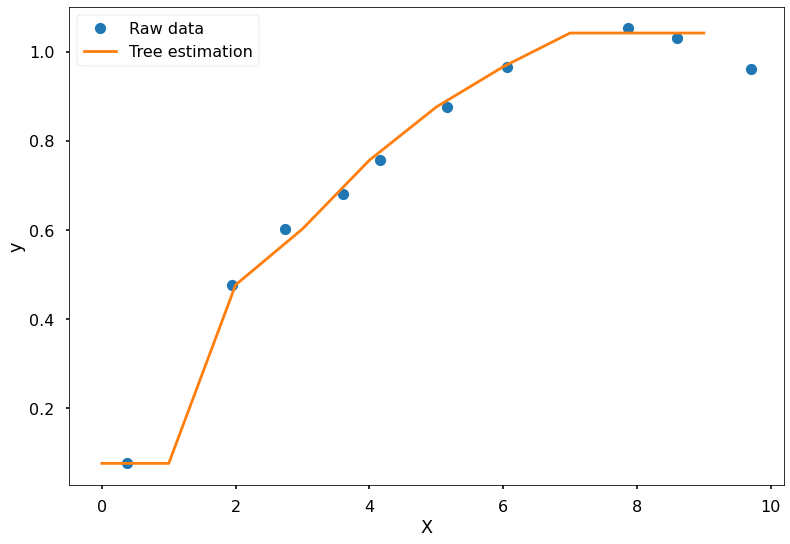

In [19]:
plt.plot(x, y_n, 'o', label = 'Raw data')
plt.plot(np.arange(n), y_pred, label='Tree estimation')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

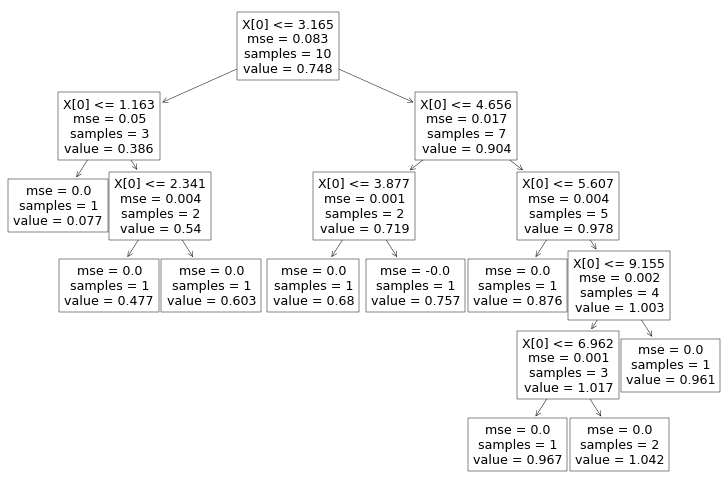

In [20]:
tree.plot_tree(clf)
plt.show()

## Set the complexity parameter

The `ccp_alpha` parameter is a hyper-parameter that uses can strike a balance between cost and complexity by pruning the trees. The basic idea behind it is to find the minimum depth that gives you good results. We know that the more depth you have, the easier you will overfit your data. Therefore, by selecting a smaller tree (but not that small, which will underfit your data), it will gives a better results. As for how to set this value, best practice is to use cross-validation to find it. 


In [21]:
tree.DecisionTreeRegressor?

In [22]:
clf = tree.DecisionTreeRegressor(ccp_alpha=0.005)
clf = clf.fit(x[:, np.newaxis], y_n)
y_pred = clf.predict(np.arange(n)[:, np.newaxis])

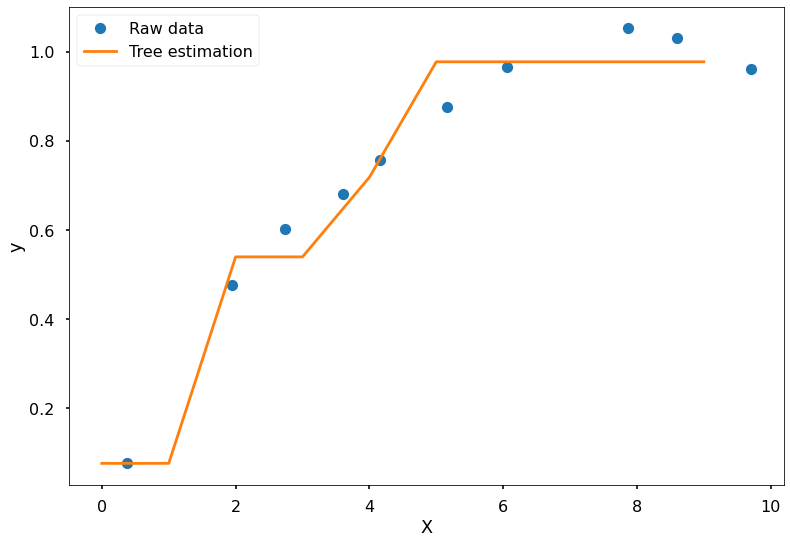

In [23]:
plt.plot(x, y_n, 'o', label = 'Raw data')
plt.plot(np.arange(n), y_pred, label='Tree estimation')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

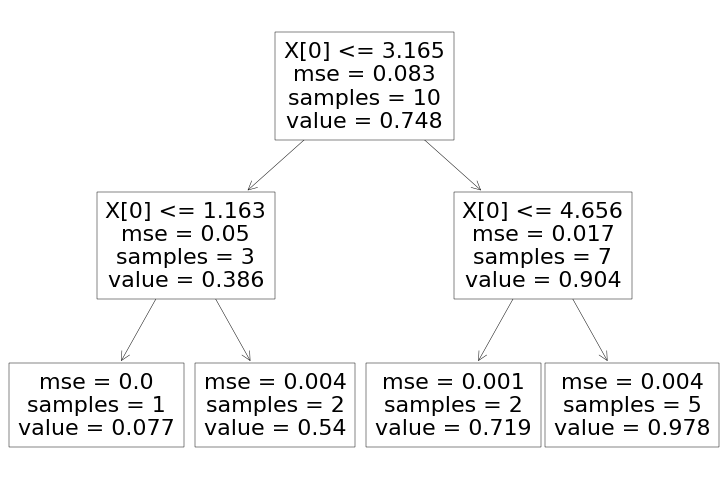

In [24]:
tree.plot_tree(clf)
plt.show()

## Classification measures

To understand Gini and Entropy, let's assume at a node, we have different fractions p for two classes problems. Therefore, we will have the fractions at this node as p and 1-p. 

* Gini
* Entropy

In [25]:
def gini(p):
  p = np.array(p)
  return 1 - sum(p**2)

def entropy(p):
  results = []
  for x in p:
    if x == 0:
      results.append(0)
    else:
      results.append(x*np.log2(x))
  return -sum(results)

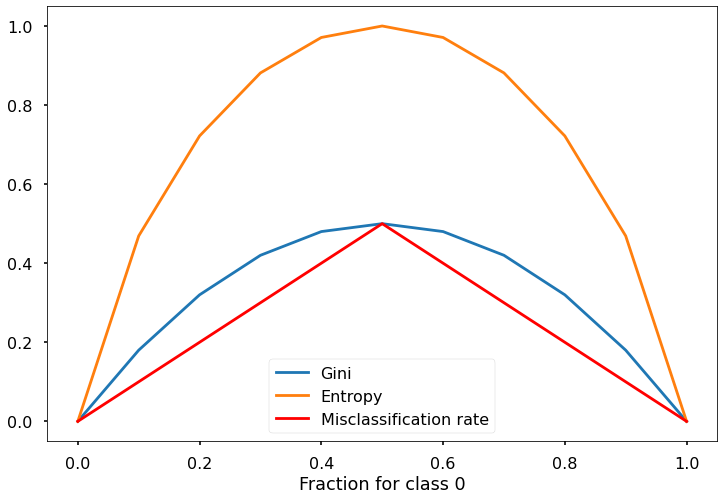

In [26]:
p_values = np.arange(0, 1.1, 0.1)
gini_values = [gini([p, 1-p]) for p in p_values]
entropy_values = [entropy([p, 1-p]) for p in p_values]
misclassification_rate = [1-p if p > 0.5 else p for p in p_values]

plt.figure(figsize=(12, 8))
plt.plot(p_values, gini_values, label='Gini')
plt.plot(p_values, entropy_values, label='Entropy')
plt.plot(p_values, misclassification_rate, c = 'r', label='Misclassification rate')
plt.xlabel('Fraction for class 0')
plt.legend()
plt.show()

## Classification example

Now let's look at an example for classification with more features. Having more features are similar to the above 1D example. 

In [27]:
from sklearn import datasets
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [28]:
iris = datasets.load_iris()
# let's just use two features, so that we can 
# easily visualize them
X = iris.data[:, [0, 2]]
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
# get the classes
n_class = len(set(y))
print('We have %d classes in the data'%(n_class))

We have 3 classes in the data


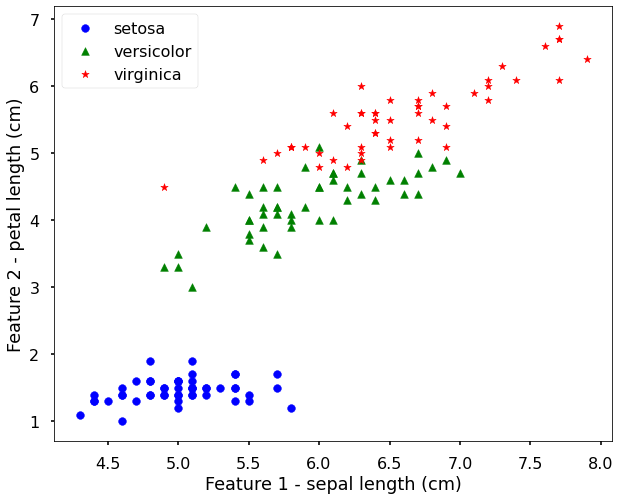

In [29]:
# let's have a look of the data first
plt.figure(figsize = (10,8))
for i, c, s in (zip(range(n_class), ['b', 'g', 'r'], ['o', '^', '*'])):
    ix = y == i
    plt.scatter(X[:, 0][ix], X[:, 1][ix], color = c, marker = s, s = 60, label = target_names[i])

plt.legend(loc = 2, scatterpoints = 1)
plt.xlabel('Feature 1 - ' + feature_names[0])
plt.ylabel('Feature 2 - ' + feature_names[2])
plt.show()

In [30]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X,y)
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

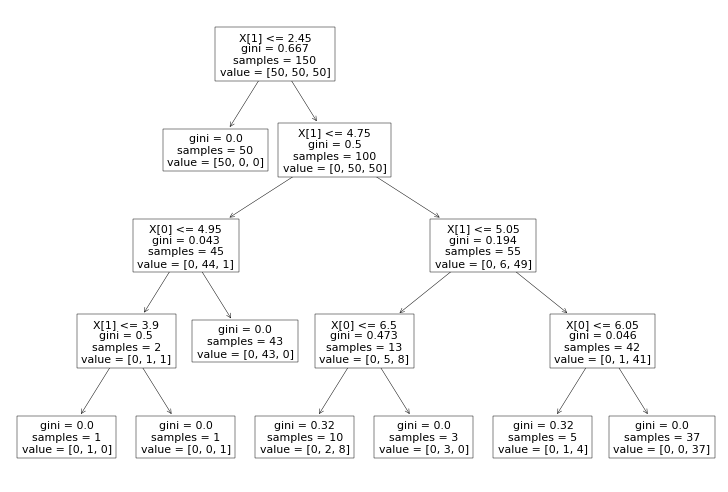

In [31]:
tree.plot_tree(clf)
plt.show()

Let's view the performance on the training data, we will plot the confusion matrix. Also, we will plot the decision boundary, which will help us understand more of the capability of the classifier (since we only have two selected features, this makes us eaiser to view the decision boundary).

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig = plt.figure(figsize=(10, 8)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# Plotting decision regions
def plot_desicion_boundary(X, y, clf, title = None):
    '''
    Helper function to plot the decision boundary for the SVM
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize = (10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    
    if title is not None:
        plt.title(title)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

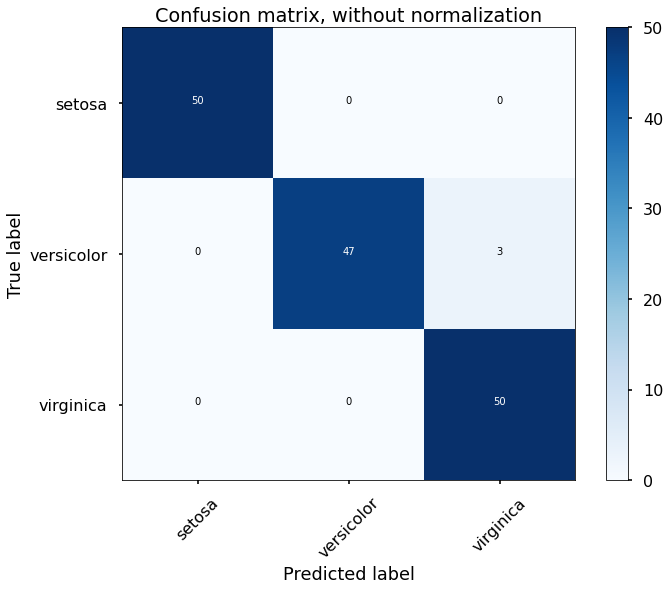

In [33]:
# predict results from the test data
predicted = clf.predict(X)

# plot the confusion matrix
cm = confusion_matrix(y,predicted)
plot_confusion_matrix(cm, classes=iris.target_names,
                      title='Confusion matrix, without normalization')

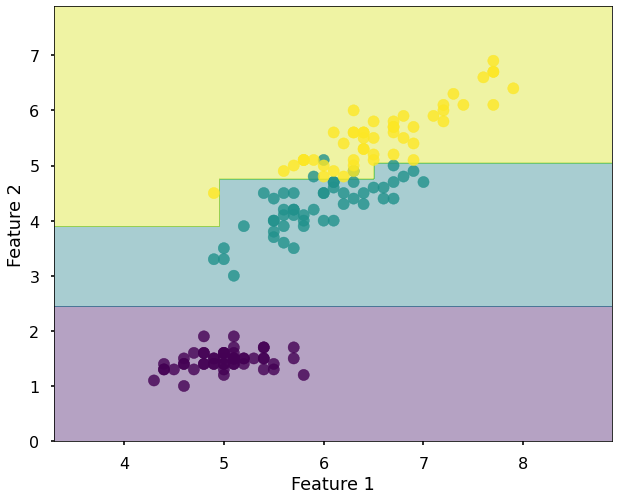

In [34]:
plot_desicion_boundary(X, y, clf)